### Import Necessary Libraries And Functions

In [1]:
import torch
import h5py
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image


from utils.WashingtonDataset import cvtColor, custom_loader, get_data_transform

### Example Image

In [2]:
rgb_image_path = r'data\examples\onion_4_1_1_crop.png'  # Path to RGB image
depth_image_path = r'data\examples\onion_4_1_1_depthcrop.hdf5'  # Path to depth image

In [3]:
def img_show(img_origin):
    img_origin = img_origin - img_origin.min()
    img_origin = img_origin / img_origin.max()
    new_img = img_origin * 255
    new_img = new_img.astype(np.uint8)
    new_img = new_img.transpose(1, 2, 0)
    return new_img

# Load RGB image
rgb_image = Image.open(rgb_image_path)

# Load depth image
# Assuming the depth image is stored in HDF5 and needs to be converted to an image for display
with h5py.File(depth_image_path, 'r') as hdf:
    depth_data = np.array(hdf['colorized_depth'])
    depth_data =  depth_data - depth_data.min()
    depth_data = depth_data / depth_data.max()
    depth_data = depth_data * 255
    depth_image = Image.fromarray(depth_data.astype('uint8'))
depth_data.shape

(93, 100, 3)

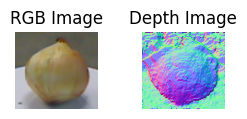

In [9]:
# Display images side by side
plt.figure(figsize=(3, 1))
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(depth_image)
plt.title('Depth Image')
plt.axis('off')

plt.show()

### Model Definition

In [5]:
import sys 
sys.path.append('D:/Python project/CNN-TransNet/CNN-TransNet/nets')
sys.path.append('D:/Python project/CNN-TransNet/CNN-TransNet/utils')

from nets.model import Model


weight_path = r'./data/weights/trail_1_96705.pth'  # Path to model weights
# Load the model
model = Model()
model.load_state_dict(torch.load(weight_path))
model.eval()

if torch.cuda.is_available():
    model.cuda()

### Perform Inference

In [6]:
class_id_to_name = {
    "0": "apple",
    "1": "ball",
    "2": "banana",
    "3": "bell_pepper",
    "4": "binder",
    "5": "bowl",
    "6": "calculator",
    "7": "camera",
    "8": "cap",
    "9": "cell_phone",
    "10": "cereal_box",
    "11": "coffee_mug",
    "12": "comb",
    "13": "dry_battery",
    "14": "flashlight",
    "15": "food_bag",
    "16": "food_box",
    "17": "food_can",
    "18": "food_cup",
    "19": "food_jar",
    "20": "garlic",
    "21": "glue_stick",
    "22": "greens",
    "23": "hand_towel",
    "24": "instant_noodles",
    "25": "keyboard",
    "26": "kleenex",
    "27": "lemon",
    "28": "lightbulb",
    "29": "lime",
    "30": "marker",
    "31": "mushroom",
    "32": "notebook",
    "33": "onion",
    "34": "orange",
    "35": "peach",
    "36": "pear",
    "37": "pitcher",
    "38": "plate",
    "39": "pliers",
    "40": "potato",
    "41": "rubber_eraser",
    "42": "scissors",
    "43": "shampoo",
    "44": "soda_can",
    "45": "sponge",
    "46": "stapler",
    "47": "tomato",
    "48": "toothbrush",
    "49": "toothpaste",
    "50": "water_bottle"
}

In [7]:
transform_rgb = get_data_transform('rgb')
transform_depth = get_data_transform('depth')

image_rgb = transform_rgb(cvtColor(Image.open(rgb_image_path))).unsqueeze(0)
image_depth = transform_depth(custom_loader(depth_image_path, 'colorized_depth')).unsqueeze(0)

if torch.cuda.is_available():
    image_rgb = image_rgb.to('cuda')
    image_depth = image_depth.to('cuda')


with torch.no_grad():
    outputs = model(image_rgb, image_depth)
    _, predicted = torch.max(outputs, 1)
    predicted_class = class_id_to_name[str(predicted.item())]

predicted_class

'onion'